In [8]:
import numpy as np
import pandas as pd

import csv
import random
import math

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, label_binarize
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import StratifiedKFold
from sklearn import model_selection

from sklearn import metrics
from sklearn.metrics import accuracy_score

In [11]:
dataset = pd.read_excel('bank_full.xlsx')
print(dataset.shape)
dataset.head()

(45211, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


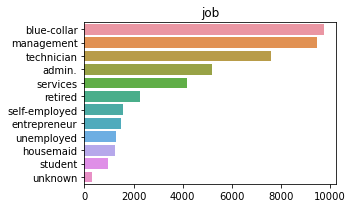

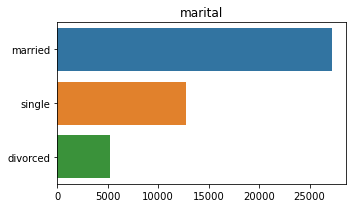

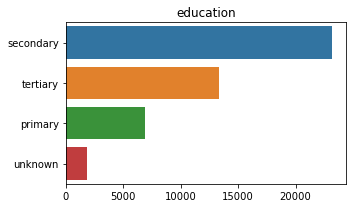

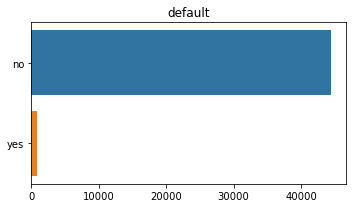

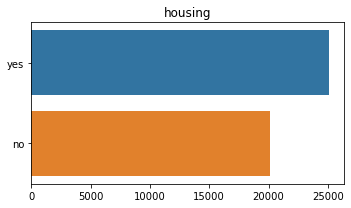

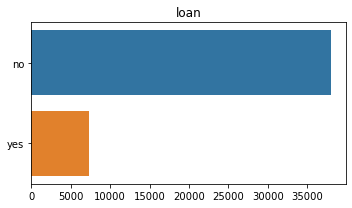

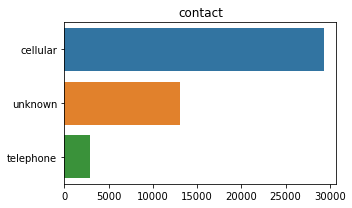

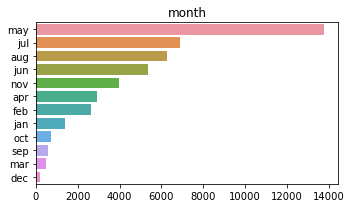

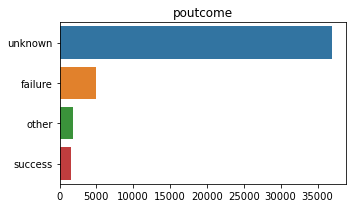

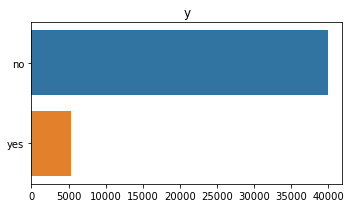

In [13]:
categorical_variables = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month','poutcome','y']
for col in categorical_variables:
    plt.figure(figsize=(5,3))
    sns.barplot(dataset[col].value_counts().values, dataset[col].value_counts().index)
    plt.title(col)
    plt.tight_layout()
    plt.show()

In [14]:
dataset.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [15]:
categorical = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
numerical = [x for x in dataset.columns.to_list() if x not in categorical]
numerical.remove('y')

In [16]:
print('Categorical features:', categorical)
print('Numerical features:', numerical)

Categorical features: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
Numerical features: ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


Correlation Matrix 



<function matplotlib.pyplot.show(*args, **kw)>

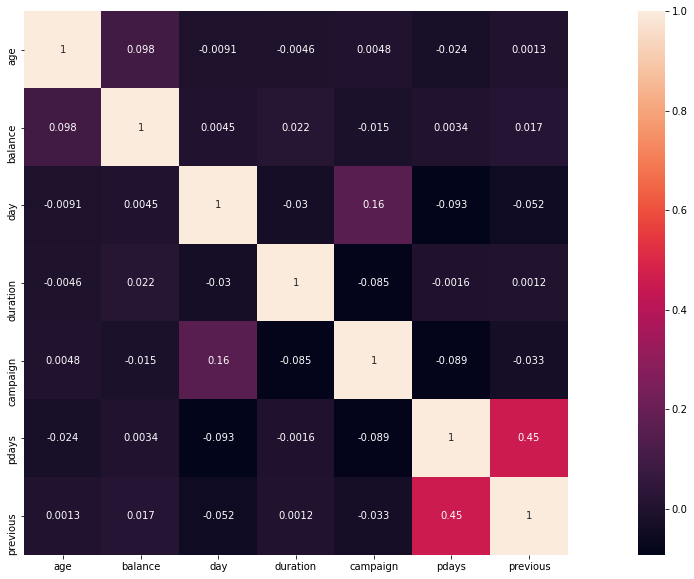

In [17]:
print("Correlation Matrix","\n")
correlation=dataset.corr(method="pearson")
plt.figure(figsize=(25,10))
sns.heatmap(correlation,vmax=1,square=True,annot=True)
plt.show